In [1]:
from code import *
import matplotlib.pyplot as plt

In [2]:
X,Y = load_usps("USPS_train.txt")
x,y = load_usps("USPS_test.txt")

In [3]:
def dataOneVSAll(datay,classe1):
    """
        :datay: liste de label
    échange les labels de la classe classe1 en 1 et les autres en -1
    """
    return np.where(datay==classe1,1,-1)

In [4]:
def listeClassifier(datax,datay,loss, loss_g,max_iter=1000,eps=0.001):
    clfs = [Lineaire(loss,loss_g,max_iter,eps) for c in range(10)]
    for c in range(10):
        clfs[c].fit(datax,dataOneVSAll(datay,c)) 
    return clfs

In [5]:
clfs = listeClassifier(X,Y,ridge,lambda x,y,w : mse_g(x,y,w),eps=0.001)

In [6]:
def predict(clfs,x):
    return np.argmax([clf.predict(x) for clf in clfs])

In [7]:
def predicts(clfs,datax):
    return np.array([predict(clfs,x) for x in datax])

In [8]:
np.mean(predicts(clfs,x)==y)

0.8555057299451918

In [9]:
ws = [clf.w for clf in clfs]

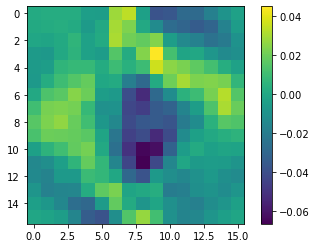

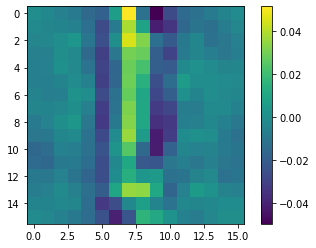

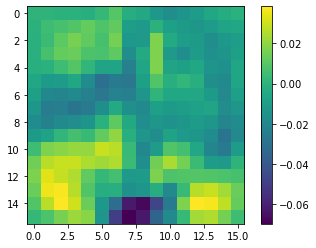

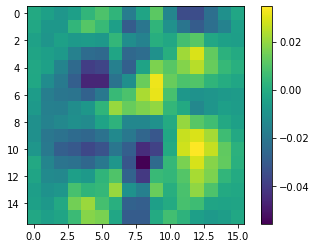

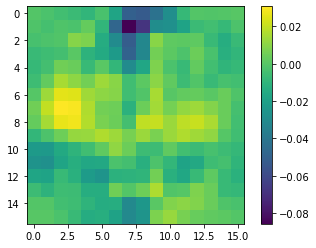

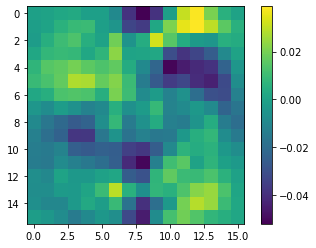

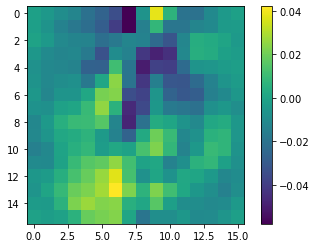

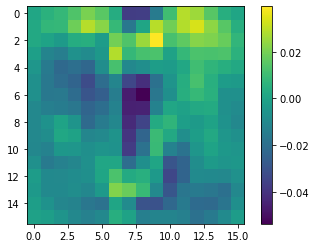

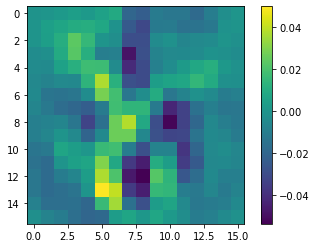

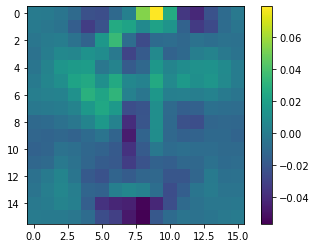

In [10]:
for w in ws :
    plt.imshow(w.reshape((16,16)))
    plt.colorbar()
    plt.show()

In [11]:
[np.sum(w==0.0) for w in ws]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [12]:
methode = {"mse":mse_g,"hinge":hinge_g,"ridge":lambda x,y,w : ridge_g(x,y,w,1),"lasso":lambda x,y,w : lasso_g(x,y,w,0.1)}

In [13]:
clfsMethode = dict()
for met, func in methode.items():
    if(met == "hinge"):
        clfsMethode[met]= listeClassifier(X,Y,ridge,func,eps=0.1)
    else:
        clfsMethode[met]= listeClassifier(X,Y,ridge,func,eps=0.001)

In [14]:
normW = {met:np.mean([np.linalg.norm(clf.w) for clf in clfs]) for met , clfs in clfsMethode.items()}

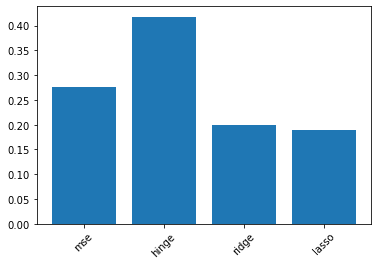

In [15]:
plt.bar(range(len(methode)), normW.values())
plt.xticks(range(len(methode)), normW.keys(),
  rotation = 45)
plt.show()